# 高斯混合聚类

In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

### 1.高斯混合聚类验证

##### 以（0，0）和（10，10）为中心，以1.2和1.8为标准差，分别生成两个簇。

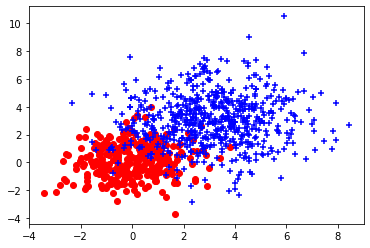

In [2]:
X1, y1 = make_blobs(n_samples=300, n_features=2, centers=[[0,0]], cluster_std=[1.2])
X2, y2 = make_blobs(n_samples=600, n_features=2, centers=[[3,3]], cluster_std=[1.8])
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='r')
plt.scatter(X2[:, 0], X2[:, 1], marker='+', color='b')
plt.show()

##### 合并样本点，对高斯混合模型进行训练

In [3]:
X = np.vstack((X1, X2))
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
print('均值：' + str(gm.means_))
print('协方差：' + str(gm.covariances_))

均值：[[3.34846664 3.18927507]
 [0.21495588 0.52584671]]
协方差：[[[ 2.86848021 -0.17581615]
  [-0.17581615  3.58287574]]

 [[ 1.66717597  0.51323582]
  [ 0.51323582  2.00749807]]]


##### 按预测结果用不同的标记显示各点

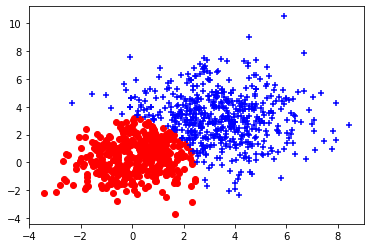

In [4]:
y_pred = gm.predict(X)
C1 = []
C2 = []
for i in range(len(X)):
    if y_pred[i] == 1:
        C1.append(list(X[i]))
    else:
        C2.append(list(X[i]))
C1 = np.array(C1)
C2 = np.array(C2)
plt.scatter(C1[:, 0], C1[:, 1], marker='o', color='r')
plt.scatter(C2[:, 0], C2[:, 1], marker='+', color='b')
plt.show()

### 2.GaussianMixture算法应用示例

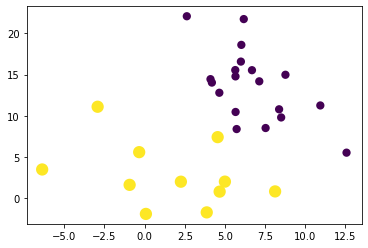

In [5]:
samples = np.loadtxt("kmeansSamples.txt")
gm = GaussianMixture(n_components=2, random_state=0).fit(samples)
labels = gm.predict(samples)
plt.scatter(samples[:,0],samples[:,1],c=labels+1.5,linewidths=np.power(labels+1.5, 2))
plt.show()